In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
len(data['User ID'])

400

In [5]:
data.drop(['User ID'], axis = 1, inplace = True)

In [6]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
data.shape

(400, 4)

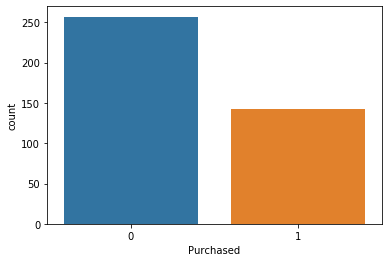

In [8]:
sb.countplot(data['Purchased'])
plt.show()

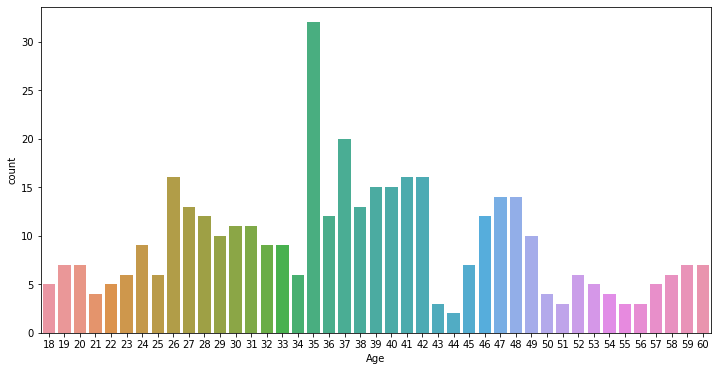

In [9]:
fig, ax = plt.subplots(figsize = (12, 6))
sb.countplot(data['Age'])
plt.show()

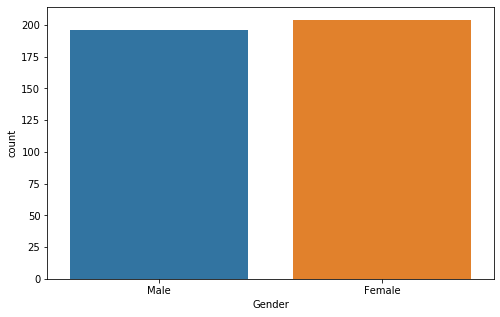

In [10]:
fig, ax = plt.subplots(figsize = (8, 5))
sb.countplot(data['Gender'])
plt.show()

In [11]:
data.drop(['Gender'], axis = 1, inplace = True)

# Applying Standard Scalar

In [12]:
X = data.iloc[:, 0:-1]
Y = data.iloc[:, -1:].values

In [15]:
X.iloc[0:1,:]

,Age,EstimatedSalary
0,19,19000


In [16]:
Y[0]

array([0])

In [17]:
X.shape, Y.shape

((400, 2), (400, 1))

In [18]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
X[0]

array([-1.78179743, -1.49004624])

# Splitting the data to Training and Test Dataset

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [21]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 2), (320, 1), (80, 2), (80, 1))

# Fitting the Training dataset to SVC Model

In [30]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 1, 21]])

# Using K_Fold Cross Validation to Evaluate the Model Performance

In [34]:
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

In [35]:
accuracies

array([0.84848485, 0.875     , 0.90625   , 0.84375   , 0.90625   ,
       0.875     , 0.875     , 0.9375    , 1.        , 0.93548387])

In [36]:
accuracies.mean()

0.9002718719452589

In [37]:
accuracies.std()

0.04520576765296457

Standard Deviation helps us to identify the variance(high variance or low variance)